In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from common import analyse_results, expand_sparsity_explanation_rate

In [2]:
sns.set_theme(style='white', palette='deep')
sns.set_context('paper', font_scale=2)

# Analize results for **Co**unterfactual Explainer for GNNs on **Dy**namic Graphs (**CoDy**)

## 1. Data Loading

### 1.1. Load the results

In [3]:
# Load results for CoDy
cody_random = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_random.parquet')
cody_recent = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_recent.parquet')
cody_closest = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_closest.parquet')
cody_1_best = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_1-best.parquet')

cody_random_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_random_wrong_only.parquet')
cody_recent_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_recent_wrong_only.parquet')
cody_closest_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_closest_wrong_only.parquet')
cody_1_best_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_1-best_wrong_only.parquet')

In [4]:
# Load results for Greedy Baseline
greedy_random = pd.read_parquet('../results/uci/greedy/results_uci_greedy_random.parquet')
greedy_recent = pd.read_parquet('../results/uci/greedy/results_uci_greedy_recent.parquet')
greedy_closest = pd.read_parquet('../results/uci/greedy/results_uci_greedy_closest.parquet')
greedy_1_best = pd.read_parquet('../results/uci/greedy/results_uci_greedy_1-best.parquet')

greedy_random_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_random_wrong_only.parquet')
greedy_recent_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_recent_wrong_only.parquet')
greedy_closest_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_closest_wrong_only.parquet')
greedy_1_best_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_1-best_wrong_only.parquet')

In [5]:
# Load resutls from TGNNExplainer
# tgnnex = pd.read_parquet('../results/uci/tgnnexplainer/results_uci_tgnnexplainer.parquet')

tgnnex_w = pd.read_parquet('../results/uci/tgnnexplainer/results_uci_tgnnexplainer_wrong_only.parquet')

### 1.2. Run analysis

In [6]:
# Analyze results for CoDy
results_cody_random = analyse_results(cody_random, 'random')
results_cody_recent = analyse_results(cody_recent, 'recent')
results_cody_closest = analyse_results(cody_closest, 'closest')
results_cody_1_best = analyse_results(cody_1_best, '1-best')

results_cody_random_w = analyse_results(cody_random_w, 'random')
results_cody_recent_w = analyse_results(cody_recent_w, 'recent')
results_cody_closest_w = analyse_results(cody_closest_w, 'closest')
results_cody_1_best_w = analyse_results(cody_1_best_w, '1-best')

In [7]:
# Analyze results for Greedy Baseline
results_greedy_random = analyse_results(greedy_random, 'random')
results_greedy_recent = analyse_results(greedy_recent, 'recent')
results_greedy_closest = analyse_results(greedy_closest, 'closest')
results_greedy_1_best = analyse_results(greedy_1_best, '1-best')

results_greedy_random_w = analyse_results(greedy_random_w, 'random')
results_greedy_recent_w = analyse_results(greedy_recent_w, 'recent')
results_greedy_closest_w = analyse_results(greedy_closest_w, 'closest')
results_greedy_1_best_w = analyse_results(greedy_1_best_w, '1-best')

In [8]:
# Analyze results for TGNNExplainer

# tgnnex['cf_example_event_ids'] = tgnnex['explanation_event_ids']
# tgnnex['orig_prediction_tgnnexplainer'] = tgnnex['original_prediction']
# tgnnex.drop('original_prediction', axis=1, inplace=True)
# tgnnex = pd.merge(tgnnex, cody_random[['explained_event_id', 'original_prediction']], how='inner', on='explained_event_id')
# tgnnex['achieves_counterfactual_explanation'] = tgnnex['original_prediction'] * tgnnex['counterfactual_prediction'] < 0

tgnnex_w['cf_example_event_ids'] = tgnnex_w['explanation_event_ids']
tgnnex_w['orig_prediction_tgnnexplainer'] = tgnnex_w['original_prediction']
tgnnex_w.drop('original_prediction', axis=1, inplace=True)
tgnnex_w = pd.merge(tgnnex_w, cody_random_w[['explained_event_id', 'original_prediction']], how='inner', on='explained_event_id')
tgnnex_w['achieves_counterfactual_explanation'] = tgnnex_w['original_prediction'] * tgnnex_w['counterfactual_prediction'] < 0

# results_tgnnex = analyse_results(tgnnex, '-')

results_tgnnex_w = analyse_results(tgnnex_w, '-')

### 1.3. Put data into dataframes

In [9]:
# Instantiate CoDy dataframes
cody = pd.DataFrame([results_cody_random, results_cody_recent, results_cody_closest, results_cody_1_best])
cody['Explainer'] = 'CoDy'

cody_w = pd.DataFrame([results_cody_random_w, results_cody_recent_w, results_cody_closest_w, results_cody_1_best_w])
cody_w['Explainer'] = 'CoDy'

In [10]:
# Instantiate Greedy Baseline dataframes
greedy = pd.DataFrame([results_greedy_random, results_greedy_recent, results_greedy_closest, results_greedy_1_best])
greedy['Explainer'] = 'Greedy'

greedy_w = pd.DataFrame([results_greedy_random_w, results_greedy_recent_w, results_greedy_closest_w, results_greedy_1_best_w])
greedy_w['Explainer'] = 'Greedy'

In [11]:
# Instantiate TGNNExplainer dataframes
# results_tgnnex['Explainer'] = 'TGNNExplainer'
# tgnnexplainer = pd.DataFrame([results_tgnnex])

results_tgnnex_w['Explainer'] = 'TGNNExplainer'
tgnnexplainer_w = pd.DataFrame([results_tgnnex_w])

In [12]:
# Combined datasets
correct_predictions = pd.concat([cody, greedy])# , tgnnexplainer])

wrong_predictions = pd.concat([cody_w, greedy_w, tgnnexplainer_w])

## 2. Analysis

### 2.1. Fidelity Analysis

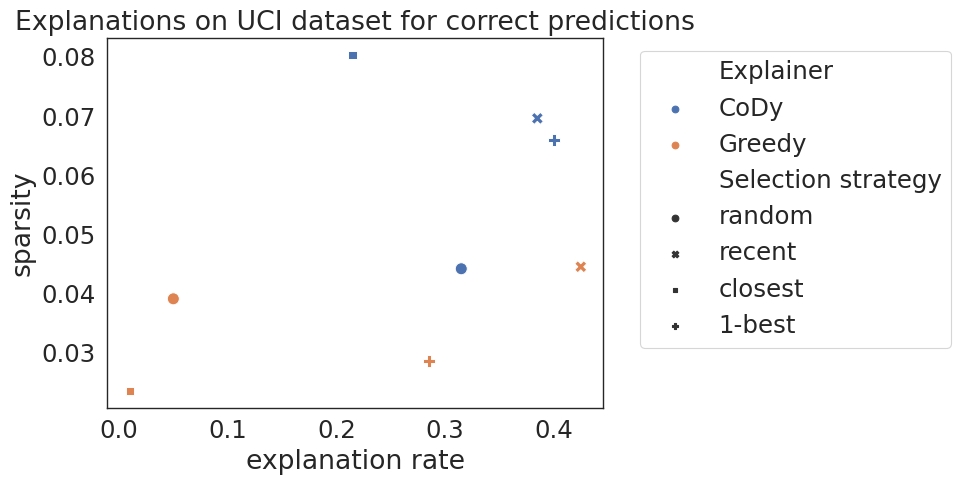

In [13]:
# Correct
sns.scatterplot(data=correct_predictions, x='explanation rate', y='sparsity', hue='Explainer', style='Selection strategy', s=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Explanations on UCI dataset for correct predictions')
plt.show()

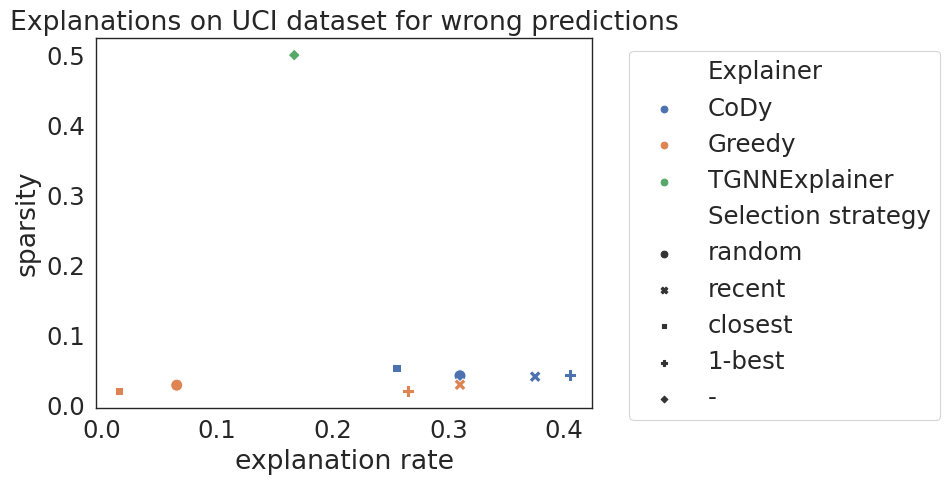

In [14]:
# Wrong
sns.scatterplot(data=wrong_predictions, x='explanation rate', y='sparsity', hue='Explainer', style='Selection strategy', s=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Explanations on UCI dataset for wrong predictions')
plt.show()

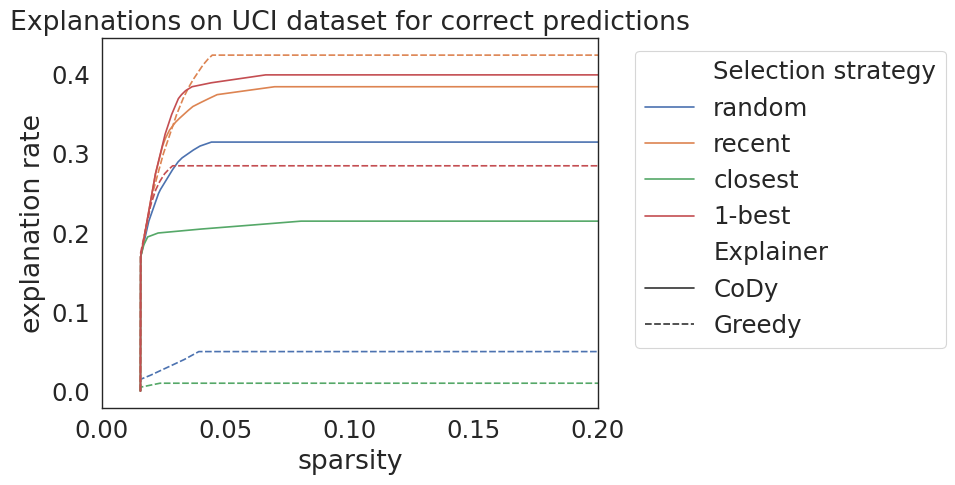

In [18]:
correct_predictions_expanded = expand_sparsity_explanation_rate(correct_predictions)
fig, ax = plt.subplots()
sns.lineplot(data=correct_predictions_expanded, x='sparsity', y='explanation rate', hue='Selection strategy', style='Explainer', ax=ax)
ax.set_xlim(0.0, .2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Explanations on UCI dataset for correct predictions')
plt.show()

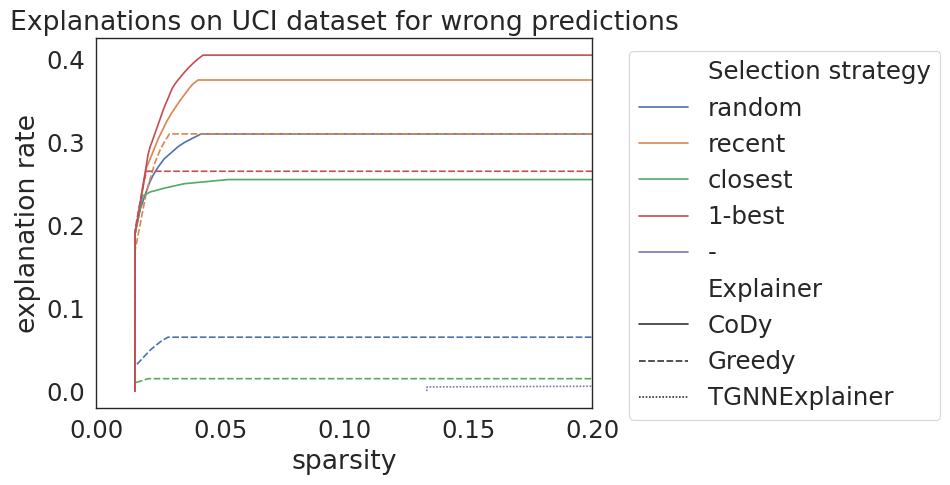

In [19]:
wrong_predictions_expanded = expand_sparsity_explanation_rate(wrong_predictions)
fig, ax = plt.subplots()
sns.lineplot(data=wrong_predictions_expanded, x='sparsity', y='explanation rate', hue='Selection strategy', style='Explainer', ax=ax)
ax.set_xlim(0.0, .2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Explanations on UCI dataset for wrong predictions')
plt.show()

In [20]:
correct_predictions

,Selection strategy,explanation rate,sparsity,avg_oracle_calls,avg_oracle_calls_cf,Duration,initialisation (s),oracle calls (s),explanation (s),sparsity_values,sparsity_list,explanation_rate_list,fidelity_plus,fidelity_minus,sparsity_all,Explainer
0,random,0.315,0.044147,261.125,174.412698,30.602891,0.000972,30.140449,0.462441,"[0.015625, 0.03125, 0.046875, 0.046875, 0.0156...","[0.015525, 0.015625, 0.0188953488372093, 0.022...","[0.0, 0.17, 0.215, 0.25, 0.255, 0.28, 0.29, 0....",0.655,0.315,0.085938,CoDy
1,recent,0.385,0.069602,261.225,197.688312,30.598102,0.000656,29.869874,0.728227,"[0.015625, 0.03125, 0.953125, 0.03125, 0.04687...","[0.015525, 0.015625, 0.02159090909090909, 0.02...","[0.0, 0.17, 0.275, 0.31, 0.32, 0.33, 0.34, 0.3...",0.660,0.385,0.097109,CoDy
2,closest,0.215,0.080305,261.135,115.581395,33.766027,0.001724,29.906573,3.859454,"[0.015625, 0.03125, 0.015625, 0.046875, 0.0156...","[0.015525, 0.015625, 0.016891891891891893, 0.0...","[0.0, 0.17, 0.185, 0.195, 0.2, 0.205, 0.21, 0....",0.630,0.215,0.078437,CoDy
3,1-best,0.400,0.066016,312.000,235.500000,37.370424,0.061604,35.995648,1.374776,"[0.015625, 0.03125, 0.640625, 0.03125, 0.04687...","[0.015525, 0.015625, 0.02159090909090909, 0.02...","[0.0, 0.17, 0.275, 0.325, 0.35, 0.37, 0.375, 0...",0.675,0.400,0.087266,CoDy
0,random,0.050,0.039062,24.800,25.000000,2.216180,0.000093,2.211229,0.004951,"[0.03125, 0.046875, 0.015625, 0.015625, 0.0468...","[0.015525, 0.015625, 0.01953125, 0.033203125, ...","[0.0, 0.015, 0.02, 0.04, 0.05, 0.05]",0.280,0.050,0.023906,Greedy
1,recent,0.425,0.044485,36.150,28.470588,2.760051,0.000093,2.753260,0.006790,"[0.015625, 0.0625, 0.0625, 0.09375, 0.015625, ...","[0.015525, 0.015625, 0.020833333333333332, 0.0...","[0.0, 0.17, 0.255, 0.3, 0.35, 0.37, 0.385, 0.3...",0.610,0.425,0.047500,Greedy
2,closest,0.010,0.023438,24.250,15.000000,1.729939,0.000092,1.723865,0.006074,"[0.015625, 0.03125]","[0.015525, 0.015625, 0.0234375, 1.0]","[0.0, 0.005, 0.01, 0.01]",0.010,0.010,0.022422,Greedy
3,1-best,0.285,0.028509,88.100,71.245614,8.363943,4.161968,8.338679,0.025264,"[0.015625, 0.0625, 0.03125, 0.015625, 0.015625...","[0.015525, 0.015625, 0.01961436170212766, 0.02...","[0.0, 0.175, 0.235, 0.255, 0.265, 0.275, 0.28,...",0.640,0.285,0.043672,Greedy


In [22]:
cody_recent = cody_recent.reset_index(drop=True)
greedy_recent = greedy_recent.reset_index(drop=True)

In [24]:
greedy_recent[cody_recent['achieves_counterfactual_explanation'] ^ greedy_recent['achieves_counterfactual_explanation']]

,explained_event_id,original_prediction,counterfactual_prediction,achieves_counterfactual_explanation,cf_example_event_ids,cf_example_absolute_importances,cf_example_raw_importances,oracle_calls,candidate_size,candidates,init_duration,oracle_call_duration,explanation_duration,total_duration,prediction_explanation_events_only,achieves_sufficient_explanation
1,6833,0.584763,0.560752,False,[6769.0],[0.024010956287384033],[0.024010956287384033],20,64,"[5482, 5483, 5520, 5524, 5548, 5567, 5608, 561...",98230,2737543007,3851809,2741394816,-1.318476,False
2,6990,5.288563,0.359647,False,"[6988.0, 6969.0]","[4.896540969610214, 0.03237497806549072]","[4.896540969610214, 4.928915947675705]",30,64,"[6668, 6673, 6678, 6681, 6687, 6689, 6695, 670...",100652,2685623140,5720128,2691343268,4.891045,True
3,6998,6.496614,-1.311082,True,"[6990.0, 6991.0, 6995.0, 6992.0]","[0.5109767913818359, 0.21466779708862305, 0.46...","[0.5109767913818359, 0.725644588470459, 1.1898...",40,64,"[6874, 6875, 6879, 6885, 6887, 6889, 6890, 689...",95323,2863344504,7675274,2871019778,6.427360,True
5,7157,0.199284,0.160147,False,"[7076.0, 7092.0, 7134.0]","[0.02851085364818573, 0.008749991655349731, 0....","[0.02851085364818573, 0.03726084530353546, 0.0...",40,64,"[6931, 6938, 6944, 6945, 6946, 6947, 6948, 695...",98743,3362519544,7764558,3370284102,-1.318476,False
8,7517,6.263901,-0.464420,True,"[7513.0, 7505.0, 7507.0, 7510.0, 7508.0, 7504.0]","[1.0033884048461914, 0.2915172576904297, 0.248...","[1.0033884048461914, 1.294905662536621, 1.5434...",60,64,"[7400, 7401, 7402, 7403, 7405, 7406, 7407, 740...",98476,4301901966,11239196,4313141162,5.443662,True
19,8222,4.638823,0.065072,False,"[8219.0, 8218.0, 8221.0, 8211.0, 8205.0, 8215....","[0.43973255157470703, 4.076148137450218, 0.011...","[0.43973255157470703, 4.515880689024925, 4.527...",100,64,"[8064, 8066, 8068, 8070, 8074, 8075, 8077, 807...",97671,7322658673,19044864,7341703537,5.426239,True
23,8507,0.418058,0.138294,False,[8505.0],[0.2797640562057495],[0.2797640562057495],20,64,"[8408, 8409, 8411, 8413, 8414, 8415, 8417, 841...",87222,2009458045,3891504,2013349549,-3.460820,False
27,8732,6.939118,-0.590668,True,"[8728.0, 8726.0, 8724.0, 8721.0]","[1.7541618347167969, 1.399184226989746, 0.6236...","[1.7541618347167969, 3.153346061706543, 3.7770...",40,64,"[8656, 8657, 8658, 8659, 8662, 8663, 8664, 866...",93285,2771711966,7751100,2779463066,6.695928,True
29,8824,6.241941,-2.504005,True,"[8814.0, 8810.0, 8805.0, 8800.0]","[1.3284072875976562, 4.0051767230033875, 0.830...","[1.3284072875976562, 5.333584010601044, 6.1640...",40,64,"[8435, 8441, 8443, 8458, 8465, 8475, 8483, 848...",97906,3597347356,7699046,3605046402,7.417262,True
48,10205,6.544874,0.387097,False,"[10203.0, 10198.0, 10191.0, 10188.0]","[3.5430870056152344, 2.0015125274658203, 0.437...","[3.5430870056152344, 5.544599533081055, 5.9823...",50,64,"[10114, 10115, 10116, 10118, 10119, 10122, 101...",87820,3329717461,9527477,3339244938,9.138497,True
